In [3]:
%load_ext rpy2.ipython
%R library(dplyr); library(ggplot2); library(gridExtra)

//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘gridExtra’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following object is masked from ‘package:dplyr’:

    combine


  res = super(Functio

array(['gridExtra', 'ggplot2', 'dplyr', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], 
      dtype='|S9')

In [4]:
from __future__ import print_function
import os
import os.path as op
from itertools import groupby
from collections import defaultdict
import subprocess

if op.exists("./synteny_panel_plots") == False:
    os.mkdir("./synteny_panel_plots")

In [5]:
group_names = ["group"+str(i) for i in range(1,19)]

with open("phage_by_group.txt") as prelim_groups:
    phage_grp = {}
    phages = []
    groups = []
    for line in prelim_groups:
        line = line.rstrip("\n")
        vec = line.split("\t")
        phage_grp[vec[0]] = vec[1]
        phages.append(vec[0])
        groups
    groups = list(phage_grp.values())
    phages = list(phage_grp.keys())

phagepre = []
phage_reps = []
phage_rep_suffix = defaultdict(lambda: [])


for p in phages:
    pre = ".".join(p.split(".")[0:2])
    if pre not in phagepre:
        phagepre.append(pre)
    else:
        phage_reps.append(pre)
        
repgroups = []

for r in phage_reps:
    for g in phage_grp.keys():
        if r in g:
            repgroups.append(phage_grp[g].split(":")[-1])
            break

for p in phages:
    pre = ".".join(p.split(".")[0:2])
    suffix = p.split(".")[-2]
    if pre in phage_reps:
        phage_rep_suffix[pre].append(suffix)
print(phage_rep_suffix)
print(zip(phage_reps, repgroups))

defaultdict(<function <lambda> at 0x109409848>, {'1.247': ['B', 'A'], '2.159': ['B', 'A'], '1.233': ['B', 'A'], '1.283': ['A', 'C', 'B'], '1.118': ['B', 'A'], '1.268': ['A', 'B'], '1.115': ['B', 'A'], '1.263': ['B', 'A'], '1.139': ['B', 'A'], '2.095': ['B', 'A'], '1.111': ['A', 'B'], '1.021': ['A', 'B', 'C'], '1.189': ['B', 'O', 'C'], '1.188': ['A', 'B', 'C'], '1.034': ['O', 'X'], '1.237': ['B', 'A'], '1.217': ['O', 'Y'], '1.238': ['A', 'B'], '1.215': ['B', 'A'], '1.214': ['O', 'Y'], '1.211': ['A', 'B'], '1.249': ['B', 'A'], '1.107': ['B', 'C', 'A'], '1.122': ['A', 'B'], '1.277': ['A', 'B'], '1.271': ['B', 'A'], '1.270': ['B', 'A'], '1.198': ['B', 'A'], '1.199': ['B', 'A']})
[('1.189', '6'), ('1.238', '5'), ('1.271', '4'), ('1.107', '15'), ('1.277', '4'), ('1.215', '10'), ('1.189', '6'), ('1.214', '9'), ('1.198', '1'), ('1.199', '1'), ('1.249', '15'), ('1.247', '9'), ('1.118', '4'), ('1.211', '9'), ('1.283', '4'), ('1.122', '9'), ('1.237', '4'), ('1.270', '4'), ('1.115', '6'), ('1.188'

In [11]:
# python functions to run last:
class NonReplicates():
    def __init__(self, query, sub):
        self.query = query
        self.sub = sub
        self.bqfasta = "./step1contig1/{query}.step1.contig1.fasta".format(**locals())
        self.bsfasta = "./step1contig1/{sub}.step1.contig1.fasta".format(**locals())
        self.fqfasta = "./final_fastas_bp/{query}.final.fasta".format(**locals())
        self.fsfasta = "./final_fastas_bp/{sub}.final.fasta".format(**locals())
        self.mafbefore = "./last_aln/{query}_{sub}_before.maf".format(**locals())
        self.mafdotbefore = "./last_aln/{query}_{sub}_before_dottbl.txt".format(**locals())
        self.mafafter = "./last_aln/{query}_{sub}_after.maf".format(**locals())
        self.mafdotafter = "./last_aln/{query}_{sub}_after_dottbl.txt".format(**locals())

    def run_last(self):
        cmd1 = "lastdb {self.query}_before {self.bqfasta}".format(**locals())
        cmd2 = "lastal {self.query}_before {self.bsfasta} > {self.mafbefore}".format(**locals())
        cmd3 = "lastdb {self.query}_after {self.fqfasta}".format(**locals())
        cmd4 = "lastal {self.query}_after {self.fsfasta} > {self.mafafter}".format(**locals())
        subprocess.call(cmd1, shell=True)
        subprocess.call(cmd2, shell=True)
        subprocess.call(cmd3, shell=True)
        subprocess.call(cmd4, shell=True)
        print("last successfully run for {self.query} and {self.sub}".format(**locals()))
        maf_to_tbl(self.mafbefore, self.mafdotbefore, self.query, self.sub, self.bqfasta, self.bsfasta)
        maf_to_tbl(self.mafafter, self.mafdotafter, self.query, self.sub, self.fqfasta, self.fsfasta)
        print("maf tables converted to list for {self.query} and {self.sub}".format(**locals()))

# python functions to create a synteny table from maf output:
def read_fasta(file_handle):
    '''Fasta iterator'''
    for header, group in groupby(file_handle, lambda line: line[0] == '>'):
        if header:
            line = next(group)
            name = line[1:].strip()
        else:
            seq = ''.join(line.strip() for line in group)
            yield name, seq

def get_fasta_len(fasta):
    genome_len = 0
    with open(fasta) as ih:
        for name, seq in read_fasta(ih):
            genome_len += len(seq)
    return genome_len

def real_start(start, glen, strand):
    if strand == "+":
        rs = start + 1
    if strand == "-":
        rs = glen - (start+1)
    return rs

def advance_seq(location, strand):
    if strand == "+":
        location += 1
    elif strand == "-":
        location -= 1
    else:
        print("strand not designated!")
        raise IOError
    return location

def maf_to_tbl(maf, outfile, query, subject, query_fasta, subject_fasta):
    with open(outfile, "w") as oh:
        print(query, subject, "match", sep="\t", file=oh)
        ih = [i for i in open(maf).readlines() if i.startswith("#")==False and len(i.split())>1]
        qlen = get_fasta_len(query_fasta)
        slen = get_fasta_len(subject_fasta)
        for i in range(0, len(ih), 3):
            scores = ih[i]
            aln1 = ih[i+1]
            #print(aln1.split()[0:3])
            aln2 = ih[i+2]
            #print(aln2.split()[0:3])

            strand1 = aln1.split()[4]
            start1 = real_start(int(aln1.split()[2]), qlen, strand1)
            seq1 = aln1.split()[-1]

            strand2 = aln2.split()[4]
            start2 = real_start(int(aln2.split()[2]), slen, strand2)
            seq2 = aln2.split()[-1]
            for i, (n1, n2) in enumerate(zip(seq1, seq2)):
                start1 = advance_seq(start1, strand1)
                start2 = advance_seq(start2, strand2)
                print(start1, start2, compare_seqs(n1,n2), sep="\t", file=oh)
        for i in range(0, qlen+1):
            print(i,"NA", 0, sep="\t", file=oh)
        for i in range(0, slen+1):
            print("NA",i,0,sep="\t", file=oh)
    return outfile

def compare_seqs(n1, n2):
    if n1 == n2:
        return 1
    else:
        return 0

In [14]:
%%R
plot_synteny <- function(tbl, sname, qname){
    dott <- read.table(tbl, sep="\t", header=TRUE)
    colnames(dott)[c(1,2)] = c("query", "subject")
    smax1 = max(dott$subject)
    qmax1 = max(dott$query)
    dp1 <- ggplot(dott, aes(query, subject)) + geom_point(data = filter(dott, match==1), size=.5, aes(query, subject)) + theme_bw()
    dp1 + labs(x=paste(qname, "contig position"), y=paste(sname, "contig position")) -> dp1
    return(dp1)
}

plot_coverage <- function(coverage_tbl, name){
    tbl <- read.table(coverage_tbl, sep="\t")
    covplot <- tbl %>% ggplot(aes(V2, V3)) + geom_line() +theme_bw()
    return(covplot)
}

In [21]:
%%R

plot_grid <- function(query, sub){
    maf_before <- paste("./last_aln/",query,"_",sub,"_before_dottbl.txt", sep="")
    maf_after <- paste("./last_aln/", query,"_",sub,"_after_dottbl.txt", sep="")
    beforeA <- paste("step1contig1/cov/",query,".step1.contig1.genomecoverage.txt",sep="")
    afterA <- paste("coverage_plots_post","/",query,".final.clc.genomecoverage",sep="")
    beforeB <- paste("step1contig1/cov/", sub,".step1.contig1.genomecoverage.txt",sep="")
    afterB <- paste("coverage_plots_post","/",sub,".final.clc.genomecoverage",sep="")
    print(beforeA)
    sname <- sub
    qname <- query
    
    dph = 10
    lhs = 5
    rhs = 5
    
    dp1 <- plot_synteny(maf_before, sname, qname) + theme(plot.margin=grid::unit(c(dph,rhs,0,lhs), "pt"))
    dp2 <- plot_synteny(maf_after, sname, qname) + theme(plot.margin=grid::unit(c(dph,rhs,0,lhs), "pt"))
    
    bpA <- plot_coverage(beforeA, qname) + labs(y="Before\nread coverage", 
                                                x="", 
                                                title=qname) 
    bpA <- bpA + theme(axis.text.x = element_blank(), plot.margin=grid::unit(c(dph,rhs,0,lhs), "pt"))
    
    bpB <- plot_coverage(beforeB, sname) + theme(axis.text.x = element_blank(), 
                                                plot.margin=grid::unit(c(dph,rhs,0,lhs), "pt")) 
    bpB <- bpB + labs(x="", y="", title=sname)
    apA <- plot_coverage(afterA, qname) + labs(y="After\nread coverage", x="", title="")
    apA <- apA + theme(plot.margin=grid::unit(c(dph,rhs,0,lhs), "pt"))
    apB <- plot_coverage(afterB, sname) + theme(plot.margin=grid::unit(c(dph,rhs,0,lhs), "pt")) 
    apB <- apB + labs(x="", y="", title="")
    
    final <- grid.arrange(bpA, bpB, dp1, apA, apB, dp2,
             ncol = 3, nrow = 2, widths = c(9, 8, 9), heights = c(9,9))
    
    return(final)
}

In [12]:
pair = NonReplicates("1.068.O", "1.056.O")

In [13]:
pair.run_last()

last successfully run for 1.068.O and 1.056.O
maf tables converted to list for 1.068.O and 1.056.O


[1] "step1contig1/cov/1.068.O.step1.contig1.genomecoverage.txt"


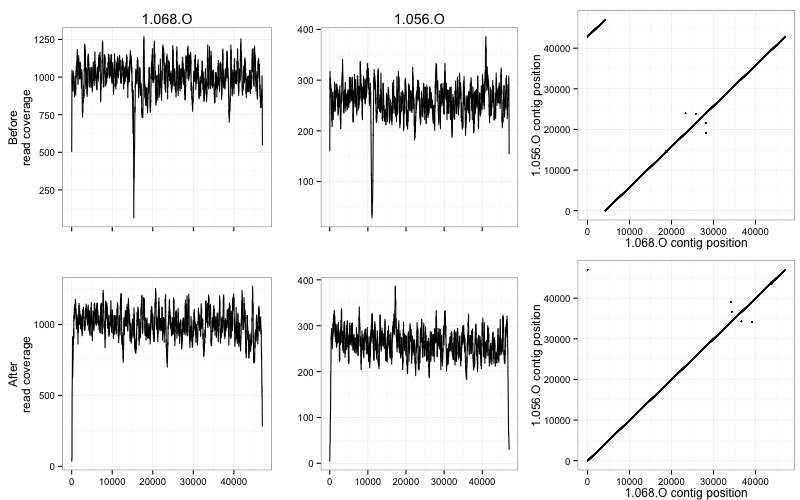

In [22]:
%%R -w 800 -h 500
out <- plot_grid("1.068.O", "1.056.O")

In [23]:
%%R
png(filename = "coverage_panel_plots/1.068.O_1.056.O_assemblycomp.png", width=800, heigh=500, units='px')
plot(out)
dev.off()

quartz_off_screen 
                2 
